#### Modelling

In this notebook, I will proceed to implement the results of my Natural Language Processing Techniques to fit my models and evaluate them.

#### __Notebook Contents__

 __4.1__ Baseline Logistic Regression
 
* Bi-grams

* Uni-grams

In [1]:
# Generic Imports
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data
X2 = joblib.load("../data/train_df.pkl")
y2 = joblib.load("../data/y_train.pkl")

X2_uni = joblib.load("../data/uni_trained.pkl")

X2_uni_test = joblib.load("../data/uni_test.pkl")
X2_test = joblib.load("../data/test_df.pkl")

y2_test = joblib.load("../data/y_test.pkl")


#### __4.1 Baseline Logistic Regression__

Now we have reached the point of building our first model, our base model. At this point we will not focus on any hyperparameters, we will run with our defaults and assess the accuracy of the model. This is a version of a model that we can compare future models against.

Note: Ideally, I would want to use sklearn's Dummy Classifier to make any predictions without looking for patterns. However, the data we have at hand is pretty balanced so we can be sure there are no biases when our models are making predictions.

#### **Bi-grams**

In [3]:
from sklearn.linear_model import LogisticRegression

#fit model on train set
logreg = LogisticRegression()
logreg.fit(X2, y2)

print(f"Train score: {logreg.score(X2, y2)}")



Train score: 0.819289167145808


We can see that our model has a train accuracy of 81%. This is not a bad accuracy score for our base model, but we could probably achieve higher accuracy with a bit of hyperparameter optimization.

With the score  of our model, we will plot the coefficients to identify words/phrases which best indicate a positive or negative sentiment.

For our use case, we will plot the coefficients for bigrams and then unigrams.

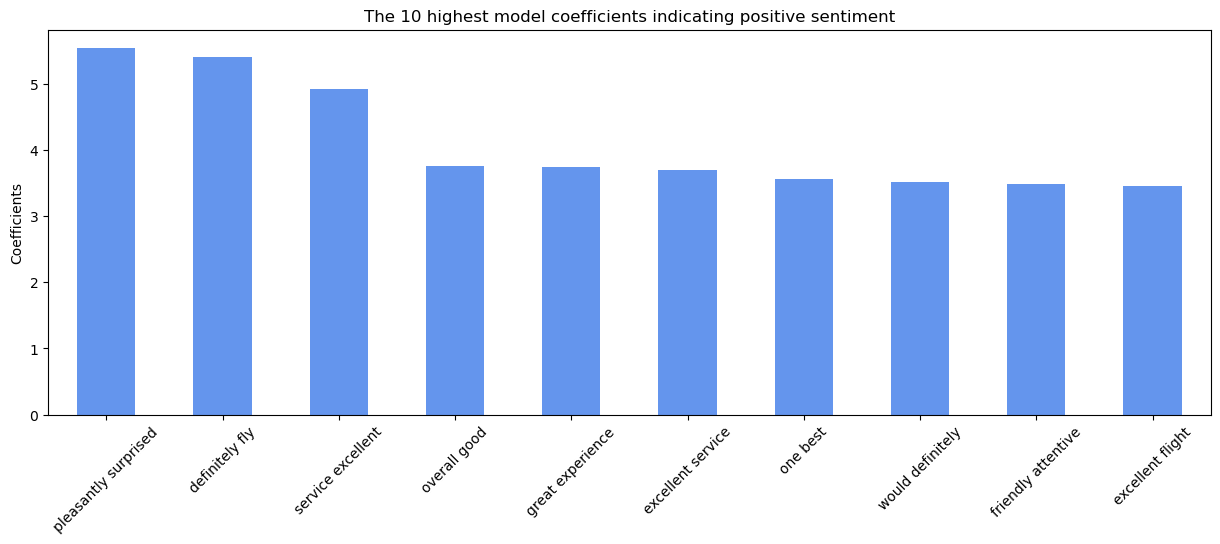

In [4]:
pos_freq = pd.DataFrame(
    {"coefficients" : logreg.coef_[0]},
    index=X2.columns
).sort_values("coefficients", ascending=False)

pos_freq.head(10).plot(kind='bar', figsize=(15,5), legend=False, color='cornflowerblue')
plt.title("The 10 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [5]:
pos_freq.head(10)

,coefficients
pleasantly surprised,5.539367
definitely fly,5.396208
service excellent,4.926817
overall good,3.759039
great experience,3.749169
excellent service,3.703323
one best,3.558429
would definitely,3.516956
friendly attentive,3.478981
excellent flight,3.448171


Top 5 phrases indicating positive sentiment

- pleseantly surprised
- definitely fly
- service excellent
- overall good
- great experience

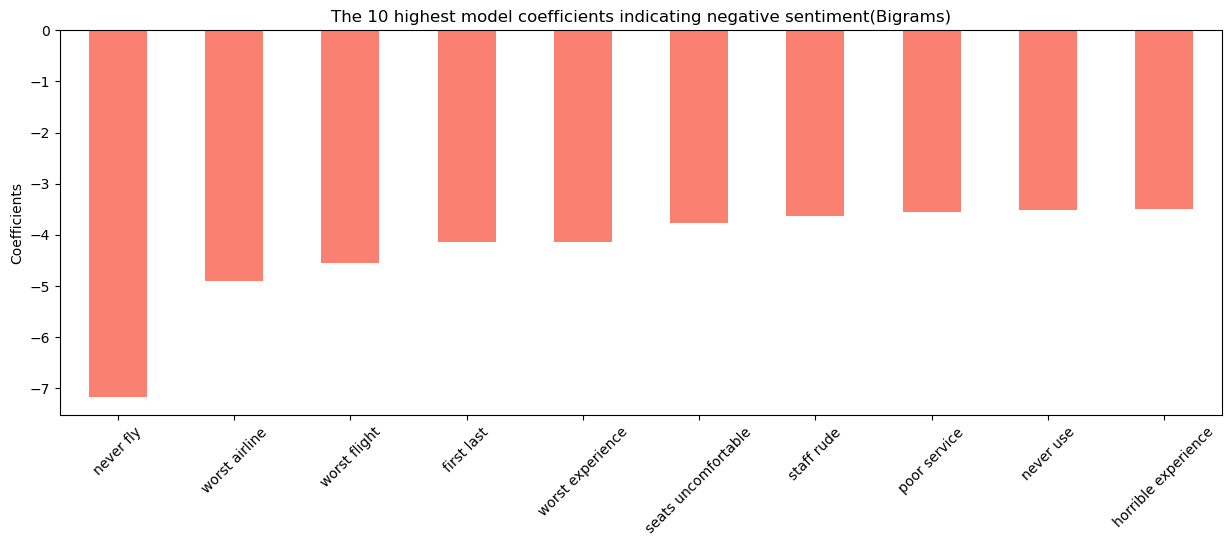

In [6]:
neg_freq = pd.DataFrame(
    {"coefficients" : logreg.coef_[0]},
    index=X2.columns
).sort_values("coefficients", ascending=True)

neg_freq.head(10).plot(kind='bar', figsize=(15,5), legend=False, color='salmon')
plt.title("The 10 highest model coefficients indicating negative sentiment(Bigrams)")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [7]:
neg_freq.head(10)

,coefficients
never fly,-7.168088
worst airline,-4.896278
worst flight,-4.542992
first last,-4.145275
worst experience,-4.135087
seats uncomfortable,-3.771653
staff rude,-3.640140
poor service,-3.549910
never use,-3.509487
horrible experience,-3.502588


Top 5 phrases indicating negative sentiment

- never fly
- worst airline
- worst flight
- first last
- worst experience

From the bsuiness standpoint, this measure is ideal for operations. For example, we can see that most customers are unhappy with `customer service`, as a whole, pointing out individual aspects such as `worst experience`, `staff rude` etc.

The main areas of improvement are to address the issues with customer service. A lot of passenegers are boarding flights and having forgettable exerience with staff.



#### **Uni-grams**

In [8]:
logreg_uni =LogisticRegression()
logreg_uni.fit(X2_uni, y2)


print(f"Train score(Unigrams): {logreg_uni.score(X2_uni, y2)}")

Train score(Unigrams): 0.8939500415255861


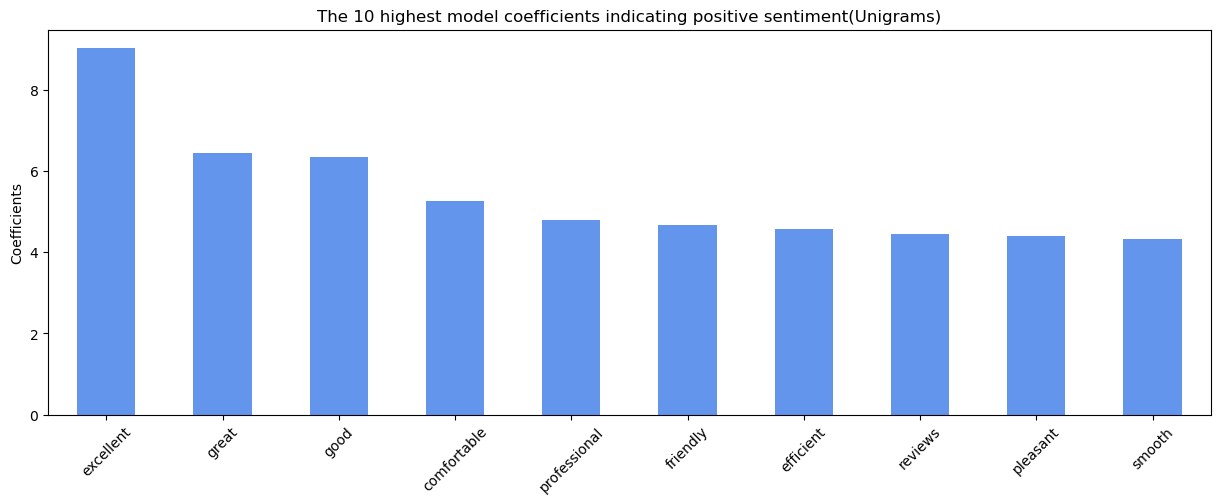

In [9]:
pos_freq_uni = pd.DataFrame(
    {"coefficients" : logreg_uni.coef_[0]},
    index=X2_uni.columns
).sort_values("coefficients", ascending=False)

pos_freq_uni.head(10).plot(kind='bar', figsize=(15,5), legend=False, color='cornflowerblue')
plt.title("The 10 highest model coefficients indicating positive sentiment(Unigrams)")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [10]:
pos_freq_uni.head(10)

,coefficients
excellent,9.019127
great,6.440195
good,6.343640
comfortable,5.261192
professional,4.780175
friendly,4.679185
efficient,4.571212
reviews,4.438330
pleasant,4.393621
smooth,4.319773


Top 5 words indicating a positive sentiment:

- excellent

- great

- good

- comfortable

- professional



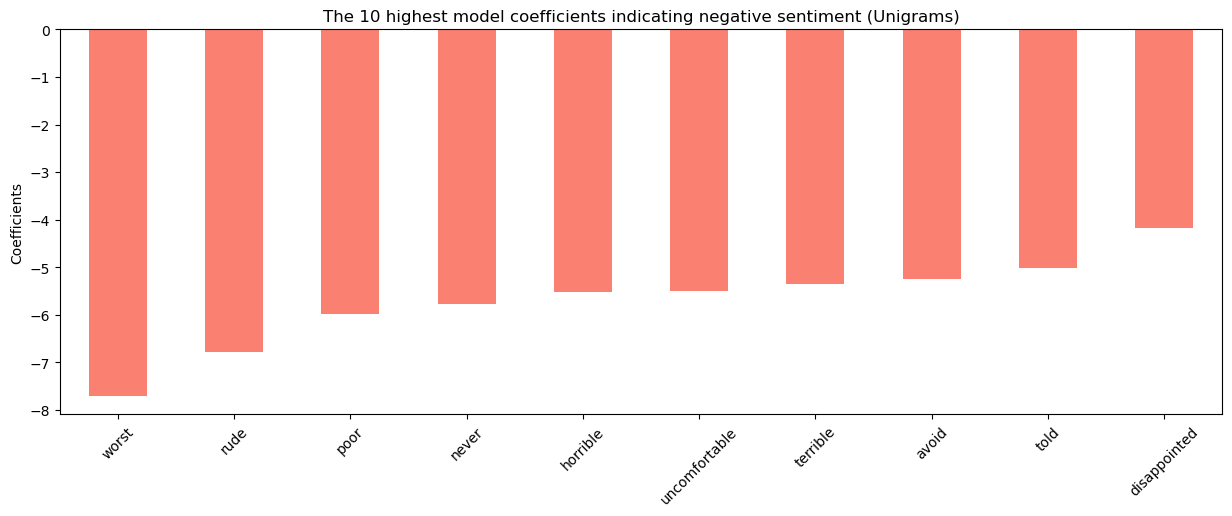

In [11]:
neg_freq_uni = pd.DataFrame(
    {"coefficients" : logreg_uni.coef_[0]},
    index=X2_uni.columns
).sort_values("coefficients", ascending=True)

neg_freq_uni.head(10).plot(kind='bar', figsize=(15,5), legend=False, color='salmon')
plt.title("The 10 highest model coefficients indicating negative sentiment (Unigrams)")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [12]:
neg_freq_uni.head(10)

,coefficients
worst,-7.712686
rude,-6.784651
poor,-5.975495
never,-5.768180
horrible,-5.513075
uncomfortable,-5.511954
terrible,-5.359046
avoid,-5.247412
told,-5.015523
disappointed,-4.175398


Top 5 words indicating a negative sentiment

- worst

- rude

- poor

- never

- horrible

In [13]:
from sklearn.metrics import classification_report

logreg_accuracy_pred_bi = logreg.predict(X2_test)

report_final = classification_report(y2_test, logreg_accuracy_pred_bi)
print(report_final)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6099
           1       0.81      0.80      0.81      5641

    accuracy                           0.81     11740
   macro avg       0.81      0.81      0.81     11740
weighted avg       0.81      0.81      0.81     11740



In [14]:
logreg_accuracy_pred_uni = logreg_uni.predict(X2_uni_test)

report_final = classification_report(y2_test, logreg_accuracy_pred_uni)
print(report_final)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6099
           1       0.89      0.88      0.89      5641

    accuracy                           0.89     11740
   macro avg       0.89      0.89      0.89     11740
weighted avg       0.89      0.89      0.89     11740



#### Closing remarks


Our mode has a higher accuracy score with unigrams, which is something to look out for. This is due to our model working at the minimum. It is able to correctly predict positive and negative sentiment. With unigrams, it is much easier for the model to reach a conclusion of a positive or negative sentiment mainly due to the capability to link adjectives to their respective sentiment.

The same works with bigrams, except, the addition of the closest related second word does infact bring some confusion to the model. Although for the best part, it still has an accuracy of 81% which is still very good at a minimum level. We would need to do some more work to get our model to identify more topics than just descriptive words. 

Next, we will look into using GridSearchCV to find the most optimal model and hyperparameters.



In [15]:
joblib.dump(logreg_uni, 'uni_log.pkl')

['uni_log.pkl']

In [16]:
joblib.dump(logreg, 'bi_logreg.pkl')

['bi_logreg.pkl']